# Predicting Board Game Complexity
> By Q Leedham

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Predicting-Board-Game-Complexity" data-toc-modified-id="Predicting-Board-Game-Complexity-0"><span class="toc-item-num">0&nbsp;&nbsp;</span>Predicting Board Game Complexity</a></span></li><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Executive-Summary" data-toc-modified-id="Executive-Summary-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Executive Summary</a></span></li><li><span><a href="#Importing-Libraries-&amp;-Data" data-toc-modified-id="Importing-Libraries-&amp;-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Importing Libraries &amp; Data</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Feature Engineering</a></span></li><li><span><a href="#More-EDA" data-toc-modified-id="More-EDA-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>More EDA</a></span></li><li><span><a href="#Exporting-Data" data-toc-modified-id="Exporting-Data-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Exporting Data</a></span></li></ul></div>

# Problem Statement

With platforms like Kickstarter, anyone with an idea can easily make and produce a board game on their own. But while it's easy to produce a game, it's hard to know how how complicated the game will be for players. There is a complexity, or weight, rating on [Board Game Geek](http://boardgamegeek.com), though it relies on community voting. Is it possible to predict that rating knowing what a creator would know at the start of their project? 

Is there a correlation between the mechanics and features of a board game and the game's complexity rating, or weight, on Board Game Geek?

I will use classification models for the project and judge them by their accuracy.

# Executive Summary

The goal of this project is to determine if there is a correlation between a board game's mechanics, the category of the game, and stats such as the minimum number of players or language dependency and the game's complexity, or weight, on Board Game Geek. The idea is to make it possible for designers to predict how complex their board game is for players when they're still early on in the development process. Even in play testing it can be hard to know how complicated players will find a game when the designer isn't sitting with them explaining how to play it.

The data for this project was found on Kaggle, and contained information for 20,000 games listed on Board Game Geek. The full data dictionary for the comeplete data can be found [here](https://www.kaggle.com/extralime/20000-boardgames-dataset), while the data dictionary above contains all the features I used in this project.

A base model for this project would be about 44% accurate if it just guessed medium light complexity for all games in the dataset. Using a Voting Classifier model I was able to find a model that is 66% accurate. Overall, there was not as much correlation between the mechanics or categories of a game and its complexity. The models did produce some interesting results in terms of their coefficients, however.

I found that mature or adult games were most likely to be lightly complex, or the simplest of all the classes in the dataset. This is likely because these games are made to be played in more social settings where players may be impaired or are otherwise not focused entirely on the game at hand. Games like Cards Against Humanity are a good example of this, where the goal of the game is simply to make the best somewhat-offensive, somewhat-adult jokes with the cards given.

Through the project I also found that, unsurprisingly, war games are among the most complex games available. This makes sense as many war games involve complicated math for combat and complicated rules for how to move individual units. That's on top of a large number of rulebooks, expansions, and miniatures that players need to buy, and in the case of the miniatures, paint, in order to play those games.

# Importing Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [2]:
# importing dataset of the top 20,000 games on Board Game Geek from:
# https://www.kaggle.com/extralime/20000-boardgames-dataset
df = pd.read_csv('../data/boardgames1.csv')
df.head()

,objectid,name,yearpublished,sortindex,minplayers,maxplayers,minplaytime,maxplaytime,minage,min_community,...,boardgameartist,boardgamepublisher,boardgamehonor,boardgamecategory,boardgameversion,boardgamemechanic,boardgameexpansion,boardgamefamily,description,gamelink
0,174430,Gloomhaven,2017,1,1,4,60,120,12,3.0,...,"['Alexandr Elichev', 'Josh T. McDowell', 'Alva...","['Cephalofair Games', 'Albi', 'Asmodee', 'Feue...",['2017 Best Science Fiction or Fantasy Board G...,"['Adventure', 'Exploration', 'Fantasy', 'Fight...","['Chinese edition', 'Czech edition', 'English ...","['Campaign / Battle Card Driven', 'Cooperative...","['Gloomhaven: Forgotten Circles', 'Gloomhaven:...","['Campaign Games', 'Components: Miniatures', '...",Gloomhaven is a game of Euro-inspired tactica...,/boardgame/174430/gloomhaven
1,161936,Pandemic Legacy Season 1,2015,2,2,4,60,60,13,4.0,...,['Chris Quilliams'],"['Z-Man Games', 'Asterion Press', 'Devir', 'Fi...",['2015 Cardboard Republic Immersionist Laurel ...,"['Environmental', 'Medical']","['Chinese blue edition', 'Chinese red edition'...","['Action Points', 'Cooperative Game', 'Hand Ma...",['None'],"['Campaign Games', 'Legacy', 'Pandemic']",Pandemic Legacy is a co-operative campaign gam...,/boardgame/161936/pandemic-legacy-season-1
2,167791,Terraforming Mars,2016,3,1,5,120,120,12,3.0,...,['Isaac Fryxelius'],"['FryxGames', 'Arclight', 'Fantasmagoria', 'Gh...",['2016 Cardboard Republic Architect Laurel Nom...,"['Economic', 'Environmental', 'Industry / Manu...","['Bulgarian edition', 'Chinese edition', 'Czec...","['Card Drafting', 'End Game Bonuses', 'Hand Ma...",['French Championship Promo Cards (fan expansi...,"['Fryxgames Future Timeline', 'Planets: Mars',...","In the 2400s, mankind begins to terraform the ...",/boardgame/167791/terraforming-mars
3,182028,Through the Ages A New Story of Civilization,2015,4,2,4,120,120,14,3.0,...,"['Filip Murmak', 'Radim Pech', 'Jakub Politzer...","['Czech Games Edition', 'Cranio Creations', 'D...",['2015 Golden Geek Best Strategy Board Game No...,"['Card Game', 'Civilization', 'Economic']","['Chinese edition', 'Czech edition', 'English ...","['Action Points', 'Auction/Bidding', 'Auction:...",['Through the Ages: New Leaders and Wonders'],"['Tableau Building', 'Through the Ages']",Through the Ages: A New Story of Civilization ...,/boardgame/182028/through-ages-new-story-civil...
4,224517,Brass Birmingham,2018,5,2,4,60,120,14,3.0,...,"['Lina Cossette', 'David Forest', 'Damien Mamm...","['Roxley', 'BoardM Factory', 'Conclave Editora...",['2018 Golden Geek Best Board Game Artwork & P...,"['Economic', 'Industry / Manufacturing', 'Tran...","['English deluxe edition', 'English retail edi...","['Hand Management', 'Income', 'Loans', 'Market...",['None'],"['Beer', 'Brass', 'Cities: Birmingham (England...",Brass: Birmingham is an economic strategy game...,/boardgame/224517/brass-birmingham


# Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   objectid                20000 non-null  int64  
 1   name                    20000 non-null  object 
 2   yearpublished           20000 non-null  int64  
 3   sortindex               20000 non-null  int64  
 4   minplayers              20000 non-null  int64  
 5   maxplayers              20000 non-null  int64  
 6   minplaytime             20000 non-null  int64  
 7   maxplaytime             20000 non-null  int64  
 8   minage                  20000 non-null  int64  
 9   min_community           14141 non-null  float64
 10  max_community           14803 non-null  float64
 11  totalvotes              20000 non-null  int64  
 12  playerage               20000 non-null  object 
 13  languagedependence      20000 non-null  int64  
 14  usersrated              20000 non-null

There are 52 columns in this dataset, many of which will be dropped shortly as they aren't relevant to the problem statement. Only two of the columns have any null data: "min_community" and "max_community." Those columns likely won't be included in the final model, as it's not data a designed would have at hand when designing a game.

In [4]:
df.keys() #getting dataframe keys

Index(['objectid', 'name', 'yearpublished', 'sortindex', 'minplayers',
       'maxplayers', 'minplaytime', 'maxplaytime', 'minage', 'min_community',
       'max_community', 'totalvotes', 'playerage', 'languagedependence',
       'usersrated', 'average', 'baverage', 'stddev', 'avgweight',
       'numweights', 'numgeeklists', 'numtrading', 'numwanting', 'numcomments',
       'siteviews', 'numplays', 'numplays_month', 'news', 'blogs', 'weblink',
       'podcast', 'label', 'boardgamedesigner_cnt', 'boardgameartist_cnt',
       'boardgamepublisher_cnt', 'boardgamehonor_cnt', 'boardgamecategory_cnt',
       'boardgamemechanic_cnt', 'boardgameexpansion_cnt',
       'boardgameversion_cnt', 'boardgamefamily_cnt', 'boardgamedesigner',
       'boardgameartist', 'boardgamepublisher', 'boardgamehonor',
       'boardgamecategory', 'boardgameversion', 'boardgamemechanic',
       'boardgameexpansion', 'boardgamefamily', 'description', 'gamelink'],
      dtype='object')

In [5]:
# keeping only the features that would effect the weight rating,
# and that a designer would theroetically know at the start of their design process
keep_cols = [
    'name', 'yearpublished', 'minplayers', 'maxplayers', 'minplaytime',
    'maxplaytime', 'minage', 'languagedependence', 'boardgamecategory_cnt',
    'boardgamemechanic_cnt', 'boardgamecategory', 'boardgamemechanic',
    'description', 'avgweight'
]
df = df[keep_cols]
df.head()

,name,yearpublished,minplayers,maxplayers,minplaytime,maxplaytime,minage,languagedependence,boardgamecategory_cnt,boardgamemechanic_cnt,boardgamecategory,boardgamemechanic,description,avgweight
0,Gloomhaven,2017,1,4,60,120,12,4,5,12,"['Adventure', 'Exploration', 'Fantasy', 'Fight...","['Campaign / Battle Card Driven', 'Cooperative...",Gloomhaven is a game of Euro-inspired tactica...,3.8078
1,Pandemic Legacy Season 1,2015,2,4,60,60,13,4,2,8,"['Environmental', 'Medical']","['Action Points', 'Cooperative Game', 'Hand Ma...",Pandemic Legacy is a co-operative campaign gam...,2.8301
2,Terraforming Mars,2016,1,5,120,120,12,3,6,9,"['Economic', 'Environmental', 'Industry / Manu...","['Card Drafting', 'End Game Bonuses', 'Hand Ma...","In the 2400s, mankind begins to terraform the ...",3.2313
3,Through the Ages A New Story of Civilization,2015,2,4,120,120,14,4,3,5,"['Card Game', 'Civilization', 'Economic']","['Action Points', 'Auction/Bidding', 'Auction:...",Through the Ages: A New Story of Civilization ...,4.3850
4,Brass Birmingham,2018,2,4,60,120,14,1,3,8,"['Economic', 'Industry / Manufacturing', 'Tran...","['Hand Management', 'Income', 'Loans', 'Market...",Brass: Birmingham is an economic strategy game...,3.9122


In [6]:
# dropping columns where the complexity rating is 0
df = df[df['avgweight'] > 0]

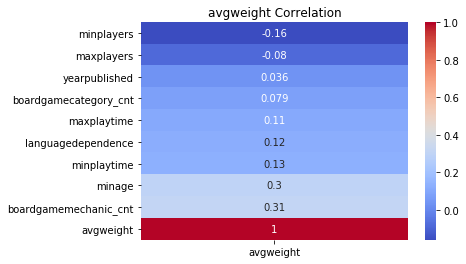

In [7]:
sns.heatmap(df.corr()[['avgweight']].sort_values('avgweight'), cmap = 'coolwarm', annot = True)
plt.title('avgweight Correlation');

It looks like the number of board game mechanics and the minum age of players are the biggest indicators of a game's weight, or complexity, rating. More mechanics and a higher minimum age would result in a game receiving a higher complexity rating. The minimum number of players also seems indicative of the weight, with the larger the minimum number of players making the game less complex.

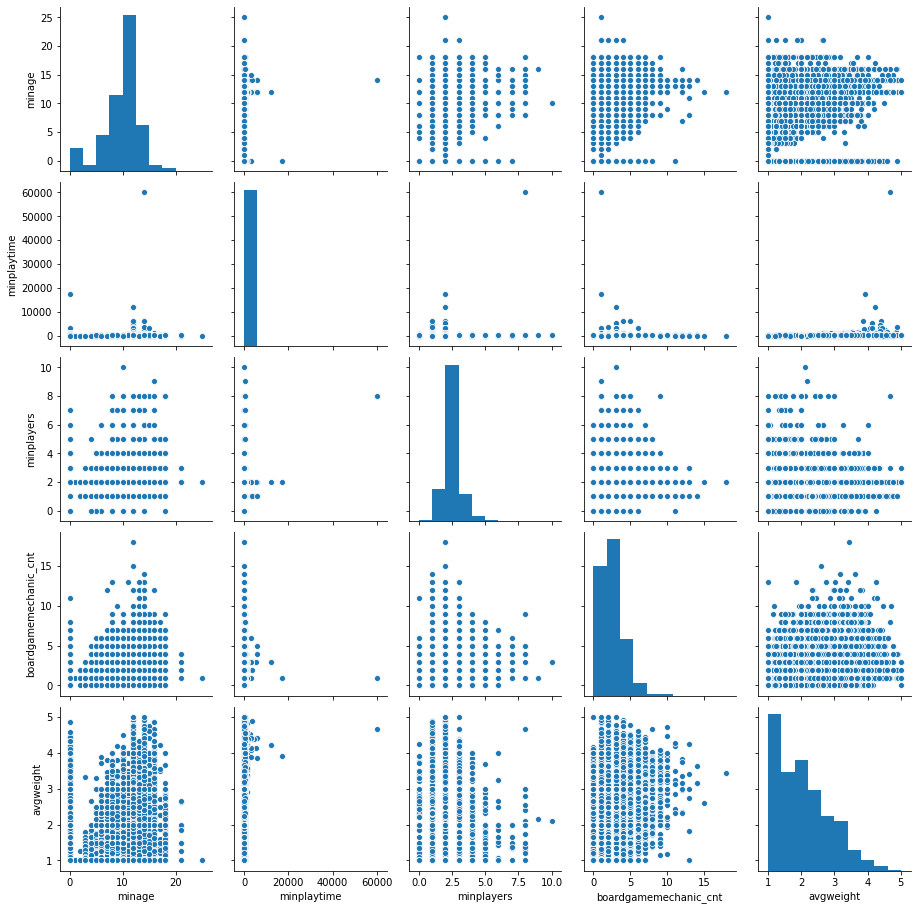

In [8]:
sns.pairplot(df[['minage', 'minplaytime', 'minplayers', 'boardgamemechanic_cnt', 'avgweight']])

There appears to be some linearity between 'avgweight' and 'minplayers', as well as 'minage'. There's a bit of a downward trend with the former, and a bit of an upward trend with the latter. The rest of the categories don't seem to have much linaerity with the weight rating, judg by this pairplot.

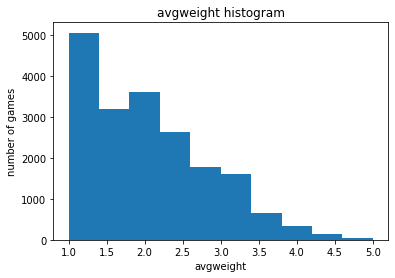

In [9]:
plt.hist(df['avgweight'])
plt.title('avgweight histogram')
plt.xlabel('avgweight')
plt.ylabel('number of games');

There is a definite right skew to the rating data, with more games scoring closer to 1 than anything else. There's a high number of games rated close to 2, as well.

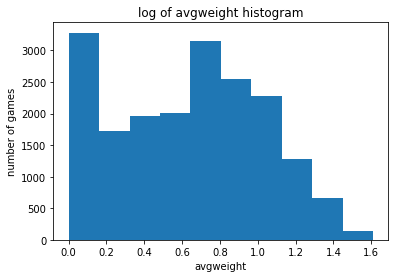

In [10]:
plt.hist(np.log(df['avgweight']))
plt.title('log of avgweight histogram')
plt.xlabel('avgweight')
plt.ylabel('number of games');

Getting the log of the weight rating evens the histogram out a litte, but there's still a large number of game scoring at the very bottom of the scale. This may not be useful in modeling.

# Feature Engineering

In [11]:
    # cleaning up the 'boardgamemechanic' column to make it easier to break it into dummy columns later
def clean_strings(feature):    
        df[feature] = df[[feature]].applymap(lambda x: x.replace("'", ''))
        df[feature] = df[[feature]].applymap(lambda x: x.replace("[", ''))
        df[feature] = df[[feature]].applymap(lambda x: x.replace("]", ''))
        return df[feature].head()
clean_strings('boardgamemechanic')

0    Campaign / Battle Card Driven, Cooperative Gam...
1    Action Points, Cooperative Game, Hand Manageme...
2    Card Drafting, End Game Bonuses, Hand Manageme...
3    Action Points, Auction/Bidding, Auction: Dutch...
4    Hand Management, Income, Loans, Market, Networ...
Name: boardgamemechanic, dtype: object

In [12]:
# cleaning up the 'boardgamecategory' column to make it easier for dummifying later
clean_strings('boardgamecategory')

0    Adventure, Exploration, Fantasy, Fighting, Min...
1                               Environmental, Medical
2    Economic, Environmental, Industry / Manufactur...
3                    Card Game, Civilization, Economic
4    Economic, Industry / Manufacturing, Transporta...
Name: boardgamecategory, dtype: object

In [13]:
mechanics_df = pd.read_csv('../data/mechanics.csv')

In [14]:
mechanics = df['boardgamemechanic'].str.get_dummies(sep = ',')
mechanics

,(Unknown),(Web published),Action / Dexterity,Action Points,Action Queue,Action Retrieval,Action/Event,Advantage Token,Adventure,American Revolutionary War,...,Variable Player Powers,Video Game Theme,Voting,Wargame,Word Game,Worker Placement,Zoch Verlag,Zombies,db-Spiele,u65b0u30dcu30fcu30c9u30b2u30fcu30e0u515a (New Board Game Party)
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19988,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
m_keys = mechanics.keys(
)  # getting a list of keys from the mechanics dataframe

m_keys = [x for x in m_keys if x in list(mechanics_df['mechanics'])
          ]  # limiting the keys to only those in the mechanics list

mechanics = mechanics[
    m_keys]  #setting the dataframe to only include columns from the mechanics list

mechanics = mechanics.add_prefix(
    'Mechanic '
)  # adding a prefix to the columns to make them easier to discern later

mechanics.head()

,Mechanic Acting,Mechanic Action Drafting,Mechanic Action Points,Mechanic Action Queue,Mechanic Action Retrieval,Mechanic Action Timer,Mechanic Action/Event,Mechanic Advantage Token,Mechanic Alliances,Mechanic Area Majority / Influence,...,Mechanic Team-Based Game,Mechanic Tile Placement,Mechanic Time Track,Mechanic Trading,Mechanic Traitor Game,Mechanic Trick-taking,Mechanic Variable Phase Order,Mechanic Variable Player Powers,Mechanic Voting,Mechanic Worker Placement
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
m_keys_final = mechanics.keys()

In [17]:
# adding the mechanics features to the original dataframe
df = pd.concat([df, mechanics], axis=1, sort=False)

In [18]:
categories = df['boardgamecategory'].str.get_dummies(sep = ',')

In [19]:
category_df = pd.read_csv('../data/categories.csv')

In [20]:
# getting keys of the categories dataframe
c_keys = categories.keys()  
# limiting the categories to only those from the website
c_keys = [x for x in c_keys if x in list(category_df['categories'])] 
# setting the dataframe to include only the categories from the website
categories = categories[c_keys]
# adding the category prefix to all the columns to make them easier to discern later
categories = categories.add_prefix('Category ')  

In [21]:
categories.head()

,Category Abstract Strategy,Category Action / Dexterity,Category Adventure,Category Age of Reason,Category American Civil War,Category American Indian Wars,Category American Revolutionary War,Category American West,Category Ancient,Category Animals,...,Category Transportation,Category Travel,Category Trivia,Category Video Game Theme,Category Vietnam War,Category Wargame,Category Word Game,Category World War I,Category World War II,Category Zombies
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
c_keys_final = categories.keys()

In [23]:
# adding the category columns to the original dataframe
df = pd.concat([df, categories], axis=1, sort=False)

In [24]:
df.head()

,name,yearpublished,minplayers,maxplayers,minplaytime,maxplaytime,minage,languagedependence,boardgamecategory_cnt,boardgamemechanic_cnt,...,Category Transportation,Category Travel,Category Trivia,Category Video Game Theme,Category Vietnam War,Category Wargame,Category Word Game,Category World War I,Category World War II,Category Zombies
0,Gloomhaven,2017,1,4,60,120,12,4,5,12,...,0,0,0,0,0,0,0,0,0,0
1,Pandemic Legacy Season 1,2015,2,4,60,60,13,4,2,8,...,0,0,0,0,0,0,0,0,0,0
2,Terraforming Mars,2016,1,5,120,120,12,3,6,9,...,0,0,0,0,0,0,0,0,0,0
3,Through the Ages A New Story of Civilization,2015,2,4,120,120,14,4,3,5,...,0,0,0,0,0,0,0,0,0,0
4,Brass Birmingham,2018,2,4,60,120,14,1,3,8,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# setting masks for correlations
m_keys_final = list(m_keys_final) + ['avgweight']
c_keys_final = list(c_keys_final) + ['avgweight']

# More EDA

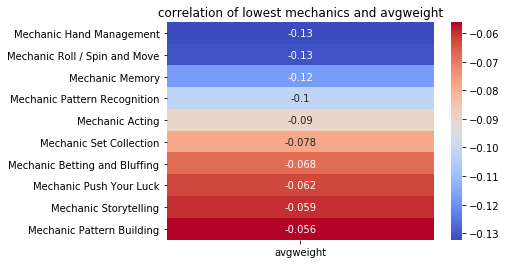

In [26]:
sns.heatmap(df[m_keys_final].corr()[['avgweight']].sort_values('avgweight').head(10), 
            cmap = 'coolwarm', annot = True)
plt.title('correlation of lowest mechanics and avgweight');

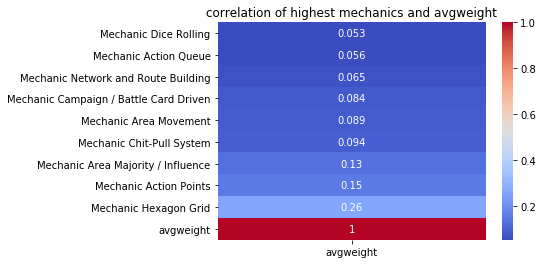

In [27]:
sns.heatmap(df[m_keys_final].corr()[['avgweight']].sort_values('avgweight').tail(10), 
            cmap = 'coolwarm', annot = True)
plt.title('correlation of highest mechanics and avgweight');

Right now it looks like only a few mechanics are significantally correlated with the weight rating. That might be an issue when it comes to modeling.

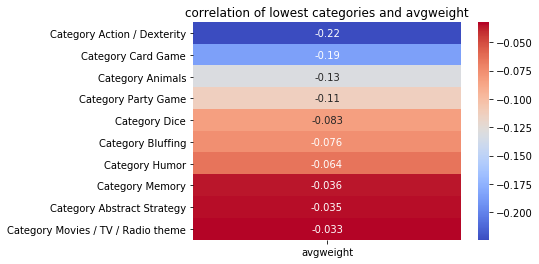

In [28]:
sns.heatmap(df[c_keys_final].corr()[['avgweight']].sort_values('avgweight').head(10), 
            cmap = 'coolwarm', annot = True)
plt.title('correlation of lowest categories and avgweight');

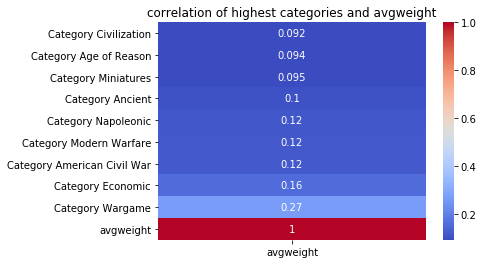

In [29]:
sns.heatmap(df[c_keys_final].corr()[['avgweight']].sort_values('avgweight').tail(10),
            cmap='coolwarm', annot=True)
plt.title('correlation of highest categories and avgweight');

There are a few more categories that are correlated with the weight rating. Unsurprisingly, war games are the biggest correlation with the rating. War games are known to have many complex rules that can be a lot for some players to deal with. Many traditional war games use custom mini pieces and sell standalone rule books in game stores.

# Exporting Data

In [30]:
# expoting the dataset to a .csv file
df.to_csv('../data/final_dataset.csv', index = False)

That's all for this notebook. The modeling and evaluation will be included in the next notebook.